# Implementing Naive Bayes from scratch using an example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import matplotlib as mpl

In [2]:
mpl.rcParams["figure.figsize"] = (8,6)
mpl.rcParams["axes.grid"] = False

In [3]:
%matplotlib inline

In [4]:
X_train = np.array([
    [0,1,1],
    [0,0,1],
    [0,0,0],
    [1,1,0]
])
Y_train = ["Y", "N", "Y", "Y"]
X_test = np.array([[1,1,0]])

In [5]:
from collections import defaultdict

def get_label_indices(labels):
    
    label_indices = defaultdict(list)
    
    for index, label in enumerate(labels):
        label_indices[label].append(index)
    return label_indices

In [6]:
label_indices = get_label_indices(Y_train)
label_indices

defaultdict(list, {'Y': [0, 2, 3], 'N': [1]})

In [7]:
def get_prior(label_indices):
    prior = {label: len(indices) for label, indices in label_indices.items()}
    total_count = sum(prior.values())
    for label in prior.keys():
        prior[label] /= total_count
    return prior

In [8]:
prior = get_prior(label_indices)
prior

{'Y': 0.75, 'N': 0.25}

In [9]:
def get_likelihood(features, label_indices, smoothing = 1):
    likelihood = {}
    for label, indices in label_indices.items():
        likelihood[label] = (np.sum(features[indices, :], axis = 0) + smoothing)/(len(indices) + 2*smoothing)
    return likelihood

In [10]:
likelihood = get_likelihood(X_train, label_indices)
likelihood

{'Y': array([0.4, 0.6, 0.4]), 'N': array([0.33333333, 0.33333333, 0.66666667])}

In [11]:
def get_posterior(X, prior, likelihood):
    posterior = prior.copy()
    for x in X:
        for label, likelihood_label in likelihood.items():
            for index, bool_value in enumerate(x):
                posterior[label] *= likelihood_label[index] if bool_value else (1-likelihood_label[index])
    total_sum = sum(posterior.values())
    posterior = {label: value/total_sum for label, value in posterior.items()}
    return posterior

In [12]:
posterior = get_posterior(X_test, prior, likelihood)
posterior

{'Y': 0.9210360075805433, 'N': 0.07896399241945673}

# Using the BernouliiNB class of naive bayes module from sklearn package

In [13]:
from sklearn.naive_bayes import BernoulliNB

In [14]:
bernoulli_nb = BernoulliNB(alpha = 1, fit_prior = True)

In [15]:
bernoulli_nb.fit(X_train, Y_train)

BernoulliNB(alpha=1)

In [16]:
bernoulli_nb.predict_proba(X_test)

array([[0.07896399, 0.92103601]])

In [17]:
bernoulli_nb.predict(X_test)

array(['Y'], dtype='<U1')

## Implimenting the movie preference predictor on Movie Lens Dataset

In [18]:
import os
from pathlib import Path

folder_path = Path(os.getcwd()) / "Dataset" / "ml-latest-small"

In [19]:
dataset_path = folder_path / "ratings.csv"

In [20]:
import pandas as pd
dataset = pd.read_csv(dataset_path)

In [21]:
## Making a copy of the original dataset for backup
# dataset_org = dataset.copy()

In [22]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
## Dropping the timestamp column

dataset.drop(["timestamp"], axis = 1, inplace = True)
dataset.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [25]:
dataset.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


<AxesSubplot: >

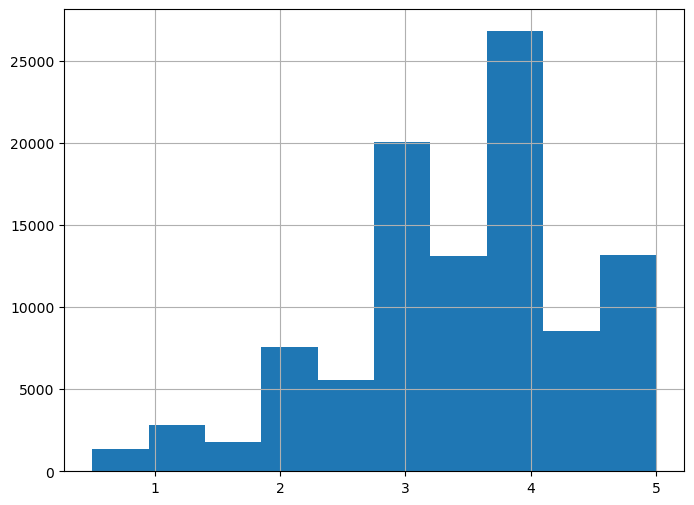

In [26]:
## Analysing the ditribution of ratings

dataset.rating.hist()

In [27]:
## Finding out the movie with the most no. of ratings

movieids = dataset.movieId.values

In [28]:
movieids

array([     1,      3,      6, ..., 168250, 168252, 170875], dtype=int64)

In [29]:
movieid_dict = defaultdict(int)
for movie in movieids:
    movieid_dict[movie] += 1

In [30]:
most_common = sorted(movieid_dict.items(), key = lambda d:d[1], reverse = True)[0]
most_common_movieId = most_common[0]
print(f"Movie ID {most_common_movieId} is the most rated movie with a total of {most_common[1]} ratings\nThe most common movie will be our target movie")


Movie ID 356 is the most rated movie with a total of 329 ratings
The most common movie will be our target movie


In [31]:
dataset.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [32]:
## Checking all the values in the rating column of the dataset
dataset.rating.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [33]:
## Since the ratings are also present in decimals, rounding off the ratings

dataset.rating = dataset.rating.apply(lambda x: np.round(x,0))

## Checking all the values in the rating column of the dataset again

dataset.rating.unique()

array([4., 5., 3., 2., 1., 0.])

In [34]:
n_users = dataset.userId.nunique()
n_movies = dataset.movieId.nunique()

print(f"Total no. of unique users are {n_users}; Total no. of unique movies present in the database are {n_movies}")

Total no. of unique users are 610; Total no. of unique movies present in the database are 9724


In [35]:
dataset_pivot = dataset.pivot(columns = "movieId", index = "userId", values = "rating")
dataset_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
## Replacing all the nan values with zero
dataset_pivot = dataset_pivot.replace(np.nan, 0)
dataset_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
## Separating the ratings for the movieId 356 as it is the target movie
Y = dataset_pivot.loc[:, most_common_movieId].values
X = dataset_pivot.drop([most_common_movieId], axis = 1, inplace=False).values

In [38]:
## Making movie with rating 3 or above as recommended (1) and below 3 as not recommended (0)
Y[Y < 3] = 0
Y[Y >= 3] = 1

In [39]:
X.shape, Y.shape

((610, 9723), (610,))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [41]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((549, 9723), (61, 9723), (549,), (61,))

In [42]:
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train, Y_train)

MultinomialNB()

In [43]:
multiNB.score(X_test, Y_test)

0.5737704918032787

In [44]:
## Trying on different combinations of alpha and fit_prior for hyperparameter tuning

from sklearn.model_selection import StratifiedKFold
from collections import defaultdict

k_fold = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

alpha_poss = np.arange(1,10)
fit_prior_poss = [False, True]

accuracy_results = defaultdict(int)

for train, test in k_fold.split(X, Y):
    train_x, train_y = X[train], Y[train]
    test_x, test_y = X[test], Y[test]
    for alpha in alpha_poss:
        for fit_prior in fit_prior_poss:
            model = MultinomialNB(alpha = alpha, fit_prior=fit_prior)
            model.fit(train_x, train_y)
            accuracy_results[(alpha, fit_prior)] = np.round(model.score(test_x, test_y)*100, 1)

In [45]:
accuracy_results

defaultdict(int,
            {(1, False): 60.7,
             (1, True): 60.7,
             (2, False): 67.2,
             (2, True): 67.2,
             (3, False): 72.1,
             (3, True): 72.1,
             (4, False): 68.9,
             (4, True): 68.9,
             (5, False): 68.9,
             (5, True): 68.9,
             (6, False): 68.9,
             (6, True): 68.9,
             (7, False): 65.6,
             (7, True): 65.6,
             (8, False): 62.3,
             (8, True): 62.3,
             (9, False): 59.0,
             (9, True): 59.0})

In [46]:
## Setting alpha = 3, as it has the best results

multiNB = MultinomialNB(alpha = 3, fit_prior = True)
multiNB.fit(X_train, Y_train)

MultinomialNB(alpha=3)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(multiNB.predict(X_test), Y_test))

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.66        28
         1.0       0.71      0.67      0.69        33

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



Therefore, we have achieved an accuracy of around 70% with alpha = 3